In [1]:
import numpy as np
import pandas as pd
import sklearn

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
dataset = pd.read_csv('https://media.githubusercontent.com/media/ShawnPatrick-Barhorst/OSRS_community_clustering/refs/heads/master/player-stats.csv')
dataset = dataset[['attack', 'defence', 'strength',
       'hitpoints', 'ranged', 'prayer', 'magic', 'cooking', 'woodcutting',
       'fletching', 'fishing', 'firemaking', 'crafting', 'smithing', 'mining',
       'herblore', 'agility', 'thieving', 'slayer', 'farming', 'runecraft',
       'hunter', 'construction']]
dataset.fillna(0, inplace=True)
dataset = dataset.sample(100000, random_state=42)



In [5]:
df = pd.read_csv('encoded_data_2.csv')
df

,x,y,z
0,-1.518422,-4.299555,-2.789485
1,-1.518422,-4.299555,-2.789485
2,-1.518422,-4.299555,-2.789485
3,-1.518422,-4.299555,-2.789485
4,-1.518422,-4.299555,-2.789485
...,...,...,...
1999620,0.590483,-1.616958,-0.061238
1999621,0.542786,-1.594390,0.045648
1999622,0.911410,-0.825379,1.254514
1999623,0.566470,-1.735126,0.107396


In [6]:
encoded_data = df.sample(100000, random_state=42).values

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(encoded_data)
scaled_data = scaler.transform(encoded_data)

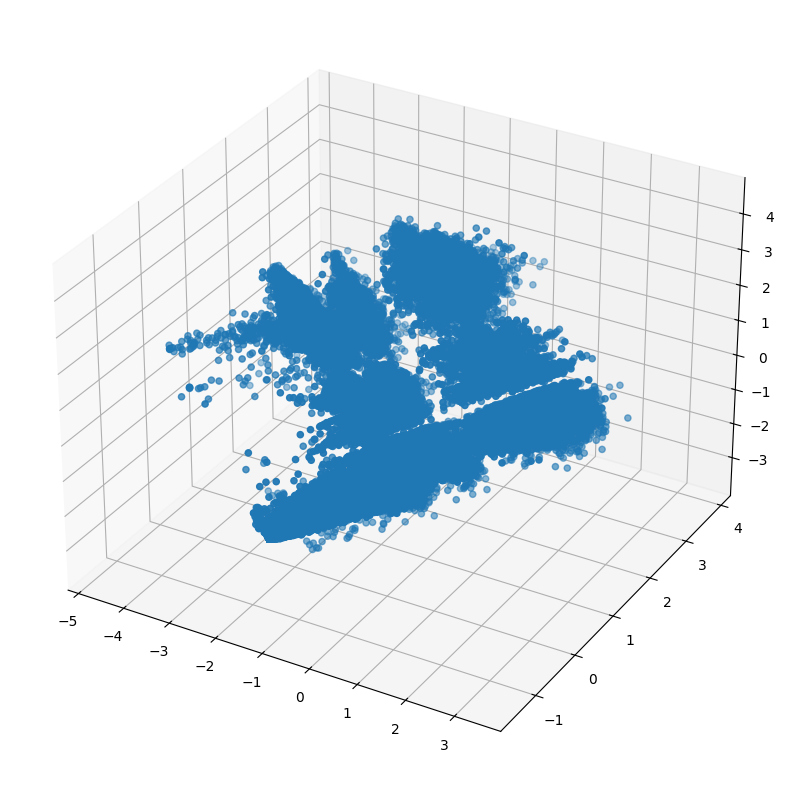

In [8]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(scaled_data[:,0], scaled_data[:,1], scaled_data[:,2])
plt.show()

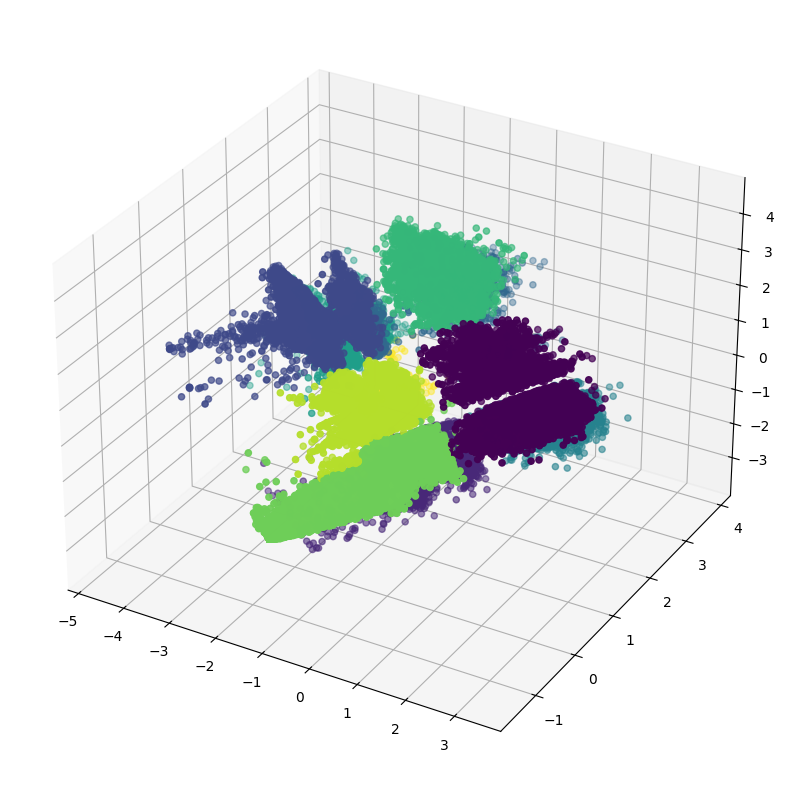

In [9]:
from sklearn.cluster import Birch

birch = Birch(n_clusters=10, threshold=0.2, branching_factor=20)
birch_pred = birch.fit_predict(scaled_data)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(scaled_data[:,0], scaled_data[:,1], scaled_data[:,2], c=birch_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


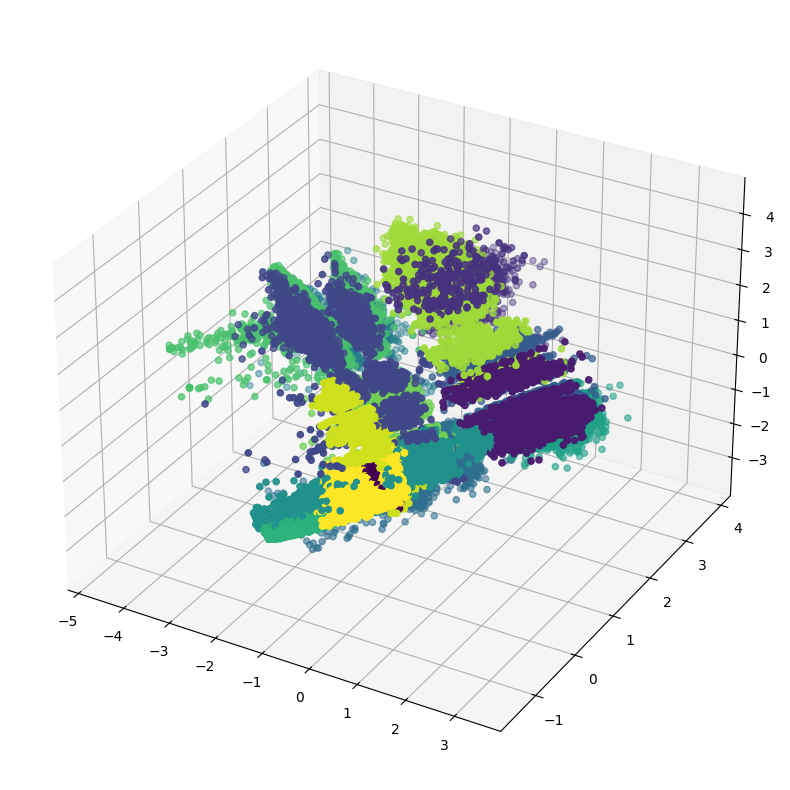

In [26]:
from sklearn.mixture import BayesianGaussianMixture

gmm = BayesianGaussianMixture(n_components=15, random_state=42, weight_concentration_prior=0.3)
gmm_pred = gmm.fit_predict(scaled_data)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(scaled_data[:,0], scaled_data[:,1], scaled_data[:,2], c=gmm_pred)

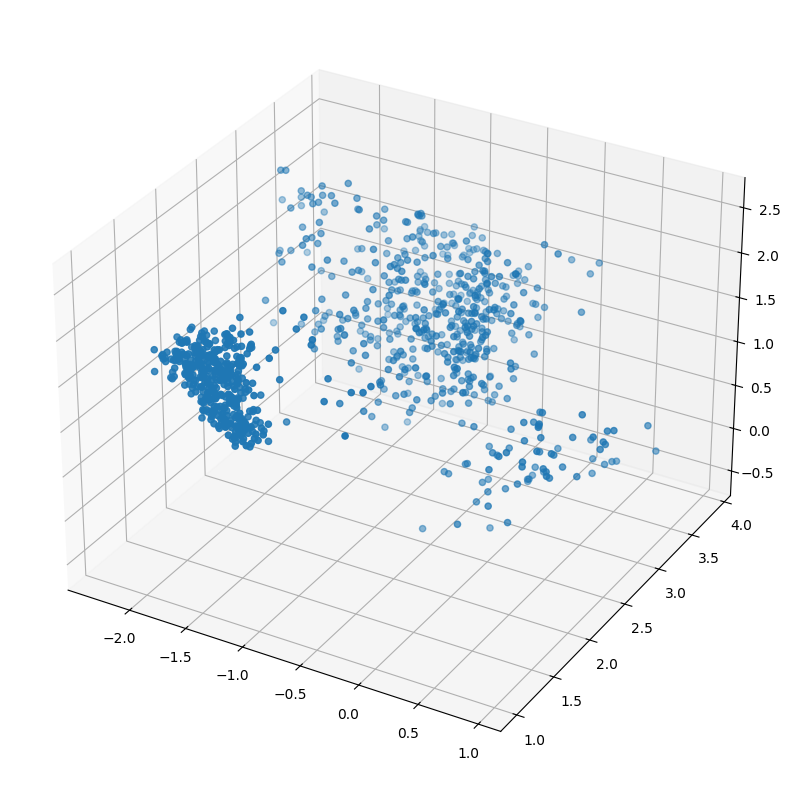

In [18]:
cluster_mask = birch_pred == 3
cluster_data = scaled_data[cluster_mask]

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cluster_data[:,0], cluster_data[:,1], cluster_data[:,2])
plt.show()

In [ ]:
from sklearn.cluster import OPTICS

final_clusters = np.zeros(len(birch_pred), dtype=int)
start = 0

for cluster_label in np.unique(birch_pred):
  cluster_mask = birch_pred == cluster_label
  cluster_data = scaled_data[cluster_mask]

  dbscan = OPTICS()
  dbscan_pred = dbscan.fit_predict(cluster_data)

  noise_mask = dbscan_pred == -1

  final_clusters[cluster_mask] = dbscan_pred + start

  final_clusters[noise_mask] = -1

  start = np.max(dbscan_pred)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_optics.py:1086: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


IndexError: boolean index did not match indexed array along dimension 0; dimension is 100000 but corresponding boolean dimension is 70953

In [ ]:
final_clusters

array([ 3.700e+01,  2.682e+03, -1.000e+00, ...,  1.200e+02, -1.000e+00,
       -1.000e+00])

In [23]:
dataset['label'] = gmm_pred
dataset.groupby(['label']).mean()

,attack,defence,strength,hitpoints,ranged,prayer,magic,cooking,woodcutting,fletching,...,smithing,mining,herblore,agility,thieving,slayer,farming,runecraft,hunter,construction
label,,,,,,,,,,,,,,,,,,,,,
0,75.400560,73.354644,79.182732,80.389740,77.205306,61.402043,75.120888,69.723897,64.536552,58.852529,...,55.821332,60.457791,50.134783,60.796397,53.381337,63.418191,47.104191,36.628934,42.518866,44.664415
1,69.412154,70.254797,68.448827,76.415352,64.436247,50.609808,72.355224,0.012154,23.709168,27.306397,...,21.532196,20.862900,22.991898,32.298294,24.728358,47.760554,14.919403,12.711087,12.115139,20.431770
2,4.561514,18.039958,7.380652,0.000000,43.287066,23.401682,41.594111,0.000000,24.621451,32.167192,...,28.487907,24.419558,21.395373,26.060988,25.876972,26.864353,17.011567,14.646688,17.106204,16.751840
3,27.476046,30.313220,18.678896,15.942996,9.010006,29.713463,66.939054,65.486659,41.589145,46.714069,...,41.273196,43.240146,31.732262,38.825652,35.151910,26.876289,26.351122,20.953305,22.955428,24.679503
4,65.120954,59.071860,51.921009,53.494789,35.665661,34.095996,0.017279,0.000823,26.975041,27.693911,...,20.849698,19.910313,19.222161,29.376851,21.041964,38.158256,15.123971,10.950082,13.582556,17.084750
5,49.063875,0.091663,74.753763,79.662293,84.815901,40.481667,78.065419,69.270359,43.774990,47.959861,...,44.875145,45.309533,41.747781,48.630066,47.367040,49.697028,35.893670,25.369355,30.345234,39.537244
6,8.541942,0.007540,8.428841,0.080113,64.541942,24.605090,44.632422,64.966070,39.809614,47.266730,...,37.378888,37.294062,30.092366,37.626767,33.163054,28.244109,23.995287,17.359095,23.910462,22.442036
7,77.719012,76.237728,81.456790,83.580741,80.741136,64.165827,78.824691,74.414617,54.862420,60.804642,...,53.685235,56.076346,50.250173,57.584691,51.025086,63.693037,43.873481,36.537877,37.112691,44.300642
8,43.428989,0.018985,72.866009,78.940124,84.352683,37.148594,76.036875,0.000730,14.197517,20.572472,...,14.873677,9.923695,18.698795,22.776926,40.281124,33.169040,13.498357,7.330047,10.450529,25.395400


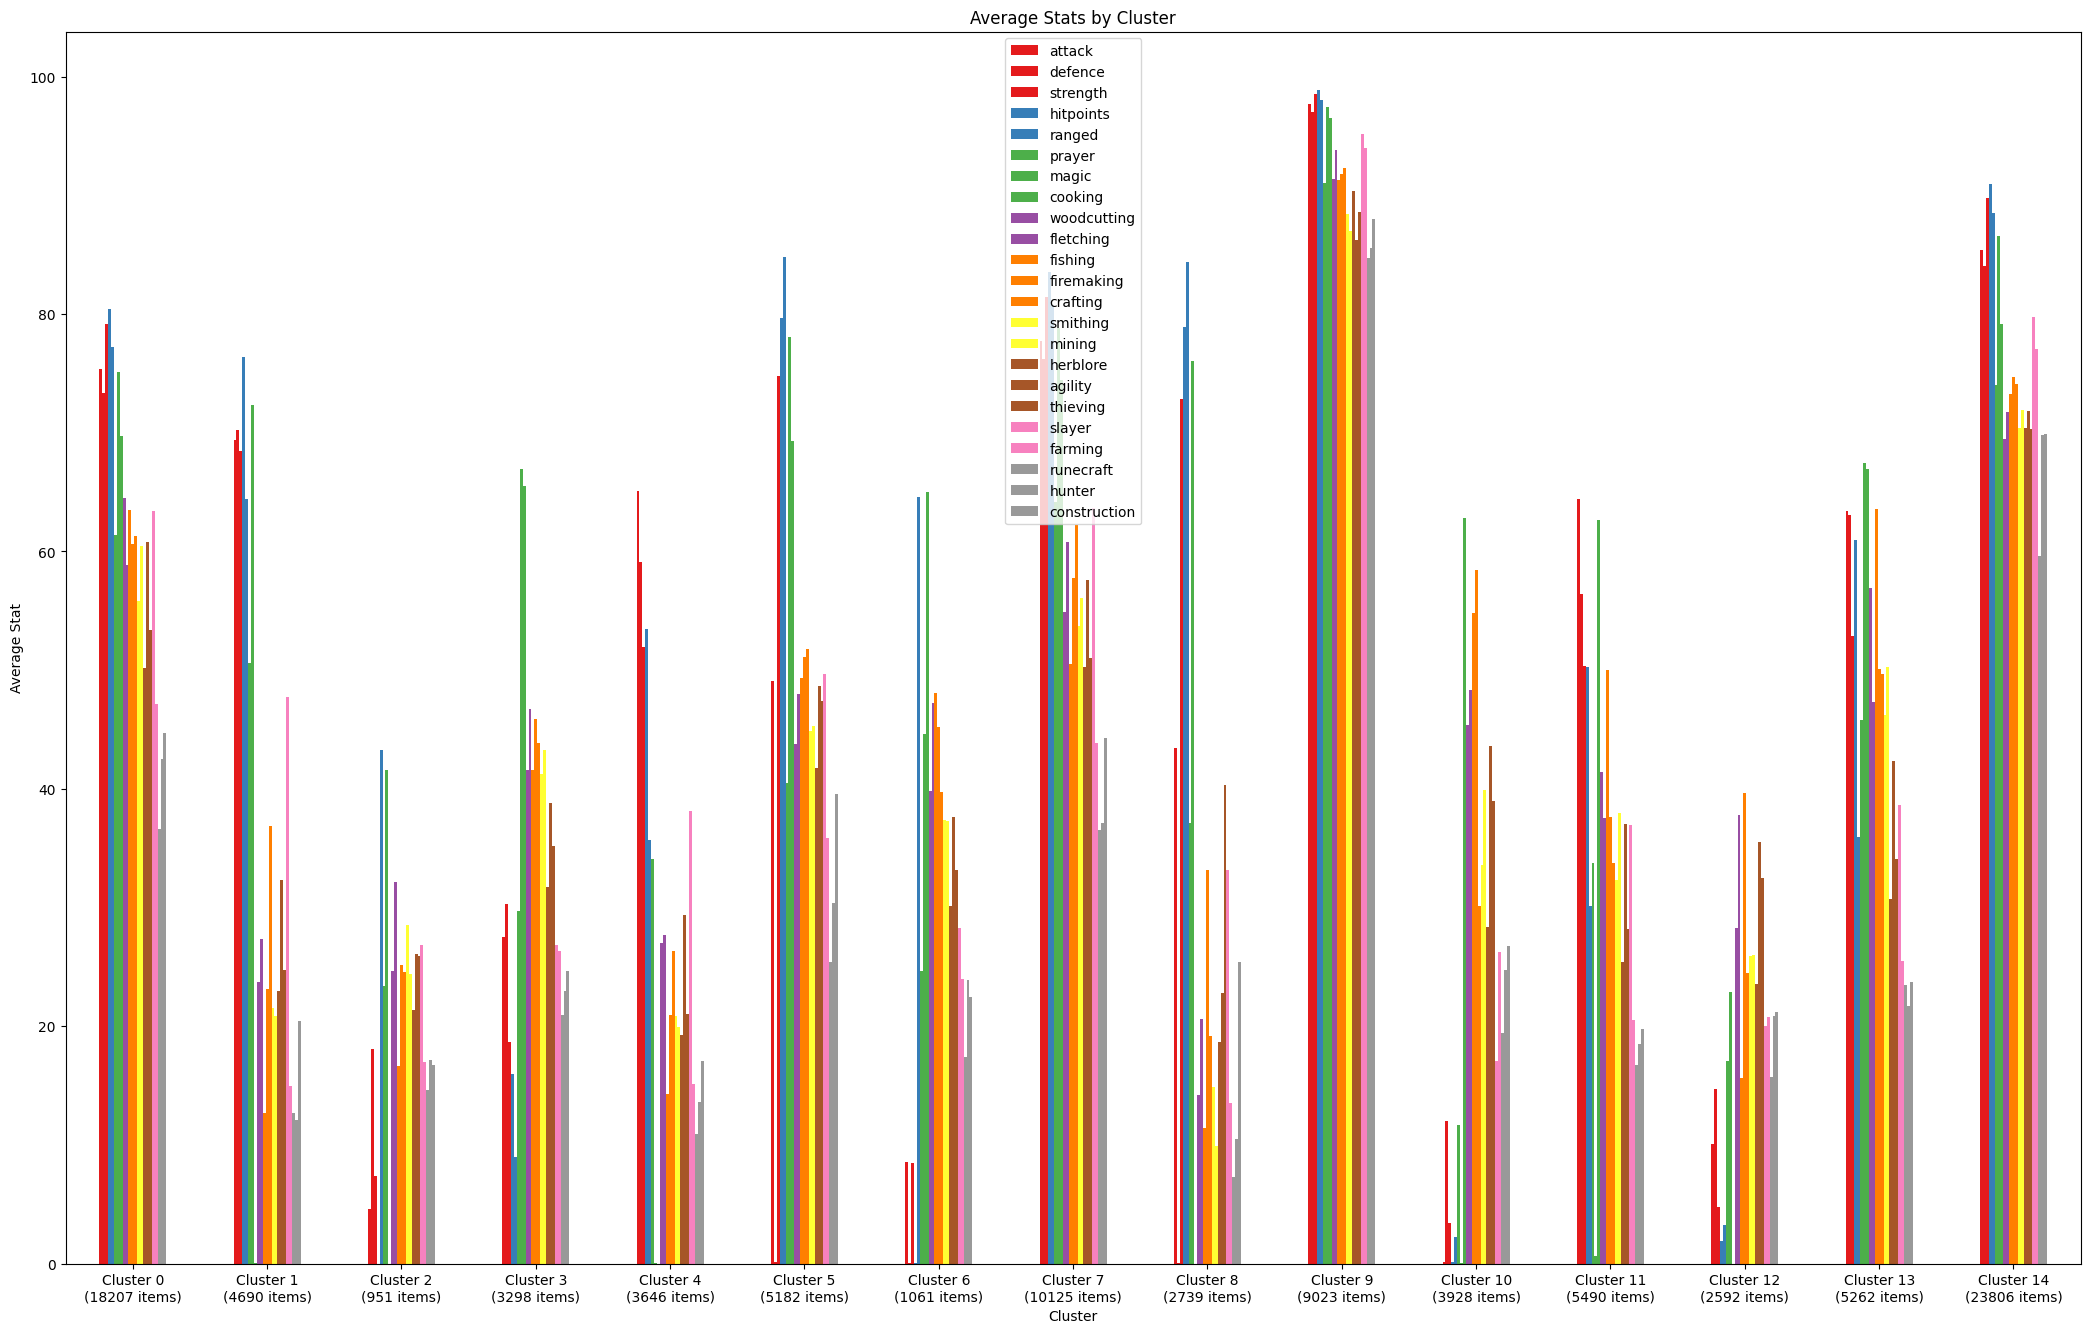

In [24]:
filtered_df = dataset[dataset['label'] != -1]

cluster_sizes = filtered_df['label'].value_counts()
cluster_labels = [f'Cluster {label}\n({count} items)' for label, count in cluster_sizes.sort_index().items()]

# Plot with updated dataset-axis labels
grouped_means = dataset.groupby('label').mean()
grouped_medians = dataset.groupby('label').median()


grouped_means[:].plot(kind='bar', figsize=(26, 16), cmap='Set1')
plt.title('Average Stats by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Stat')
plt.xticks(ticks=range(len(cluster_labels)), labels=cluster_labels, rotation=0)
plt.show()



#grouped_medians[:].plot(kind='bar', figsize=(26, 16), cmap='Set1')
#plt.title('Median Stats by Cluster')
#plt.xlabel('Cluster')
#plt.ylabel('Median Stat')
#plt.xticks(ticks=range(len(cluster_labels)), labels=cluster_labels, rotation=0)
#plt.show()

<ipython-input-12-b05a68dd50de>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("viridis", len(unique_labels))  # Use a suitable colormap


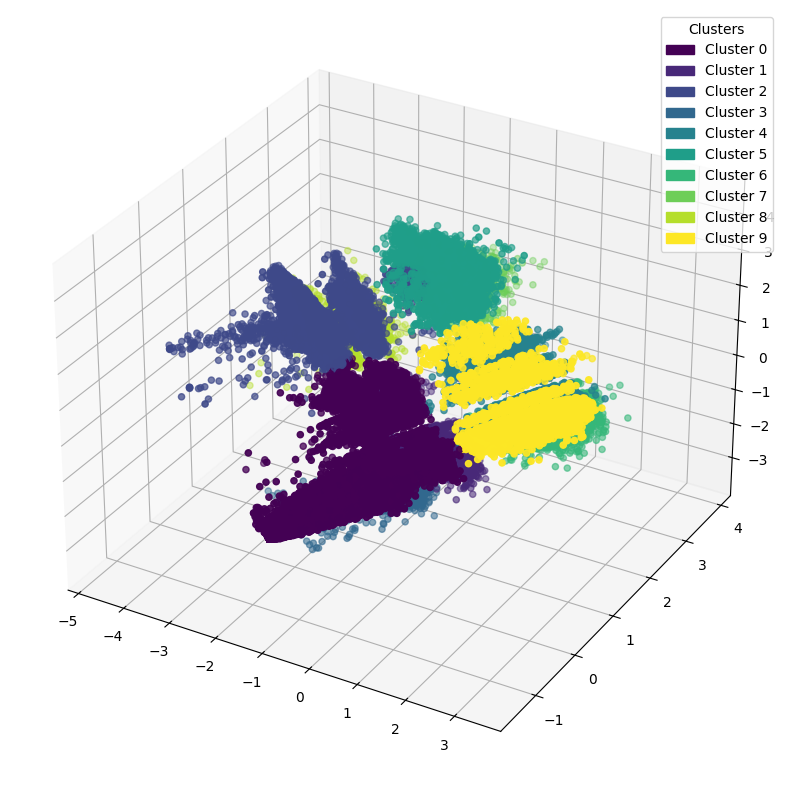

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

unique_labels = np.unique(birch_pred)

cmap = plt.cm.get_cmap("viridis", len(unique_labels))  # Use a suitable colormap
norm = plt.Normalize(min(unique_labels), max(unique_labels))

legend_handles = [
    mpatches.Patch(color=cmap(norm(label)), label=f'Cluster {label}')
    for label in unique_labels
]

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(scaled_data[:,0], scaled_data[:,1], scaled_data[:,2], c=birch_pred)
plt.legend(handles=legend_handles, title="Clusters")
plt.show()